## Market Stylized Facts

### Uncorrected Sample Standard Deviation

In [2]:
import numpy as np

In [3]:
a = np.random.standard_normal(1000)

In [5]:
a.std()

0.9938152929343704

In [6]:
s = lambda x: np.sqrt(np.sum((x - x.mean()) ** 2) / len(x))

In [7]:
s(a)

0.9938152929343704

### Geometric Brownian Motion

In [18]:
%run market_stylized_facts/geometric_brownian_motion.py

In [19]:
gbm = simulate_gbm()

In [20]:
print_statistics(gbm)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000073
Mean of Annua. Log Returns  0.018422
Std  of Annua. Log Returns  0.201944
---------------------------------------------
Skew of Sample Log Returns -0.016447
Skew Normal Test p-value    0.730950
---------------------------------------------
Kurt of Sample Log Returns  0.120578
Kurt Normal Test p-value    0.206628
---------------------------------------------
Normal Test p-value         0.424617
---------------------------------------------
Realized Volatility         0.201947
Realized Variance           0.040783


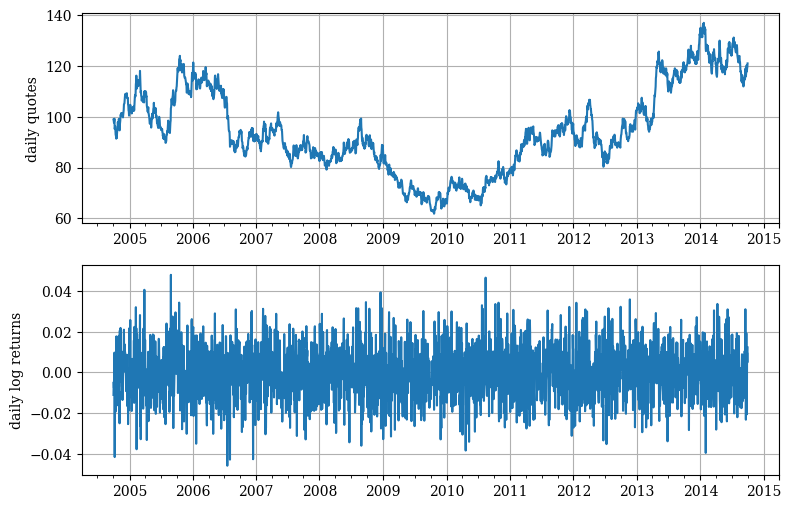

In [21]:
quotes_returns(gbm)

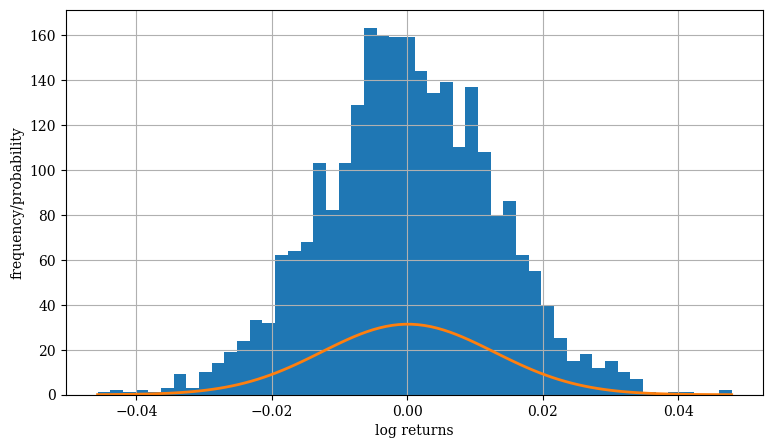

In [22]:
return_histogram(gbm)

<Figure size 900x500 with 0 Axes>

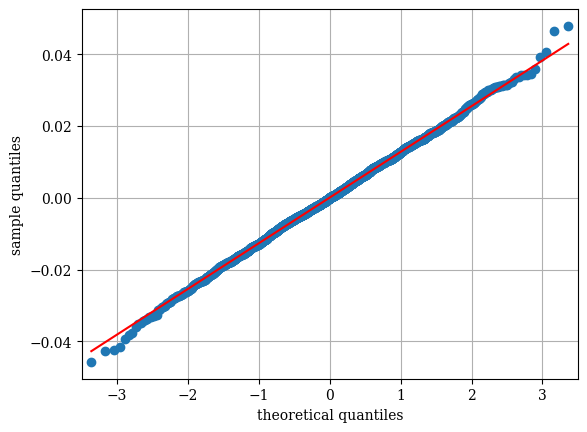

In [23]:
return_qqplot(gbm)

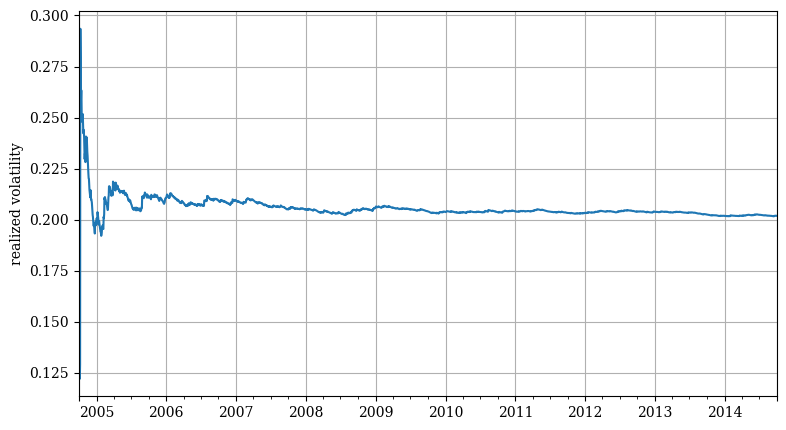

In [24]:
realized_volatility(gbm)

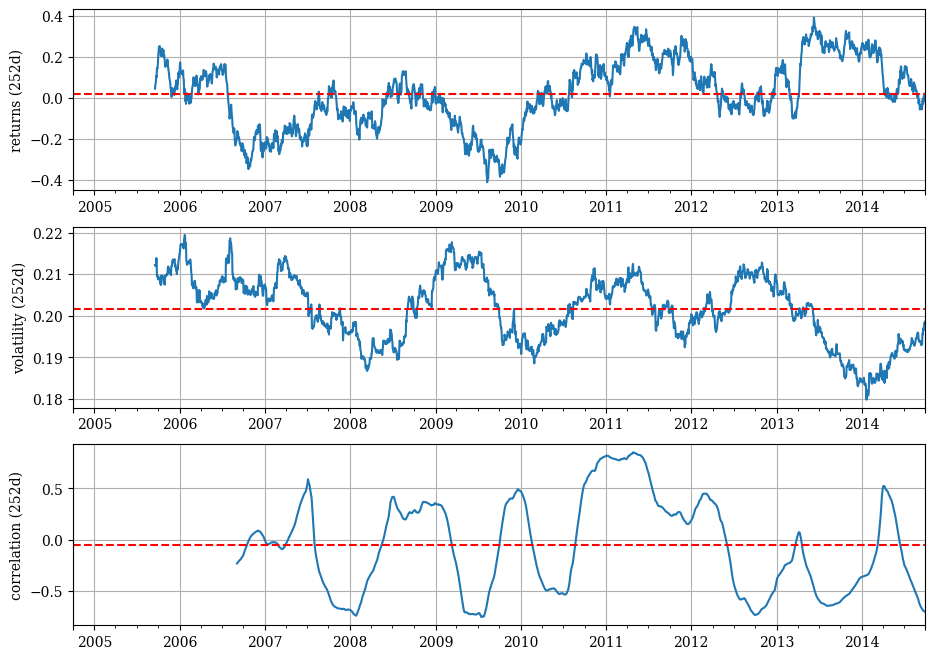

In [25]:
rolling_statistics(gbm)

### DAX Index

In [16]:
%run 03_stf/DAX_returns.py

In [17]:
DAX = read_dax_data()

In [18]:
print_statistics(DAX)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000254
Mean of Annua. Log Returns  0.063987
Std  of Annua. Log Returns  0.218582
---------------------------------------------
Skew of Sample Log Returns  0.036871
Skew Normal Test p-value    0.449487
---------------------------------------------
Kurt of Sample Log Returns  7.300400
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------
Realized Volatility         0.214515
Realized Variance           0.046017


In [19]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2511 entries, 2004-10-01 to 2014-09-30
Data columns (total 4 columns):
index      2511 non-null float64
returns    2511 non-null float64
rea_var    2511 non-null float64
rea_vol    2511 non-null float64
dtypes: float64(4)
memory usage: 98.1 KB


In [20]:
DAX[['index', 'returns', 'rea_var', 'rea_vol']].tail()

,index,returns,rea_var,rea_vol
Date,,,,
2014-09-24,9661.97,0.006952,0.046055,0.214604
2014-09-25,9510.01,-0.015853,0.046061,0.214619
2014-09-26,9490.55,-0.002048,0.046044,0.214579
2014-09-29,9422.91,-0.007153,0.046031,0.214549
2014-09-30,9474.30,0.005439,0.046017,0.214515


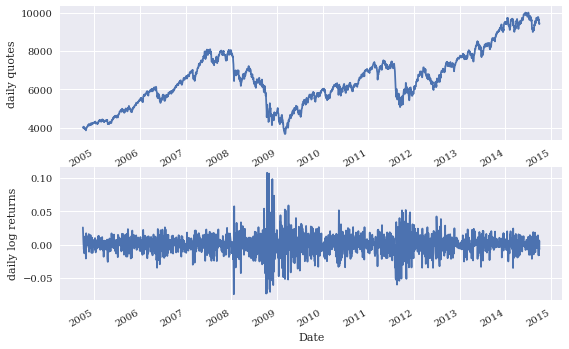

In [21]:
quotes_returns(DAX)

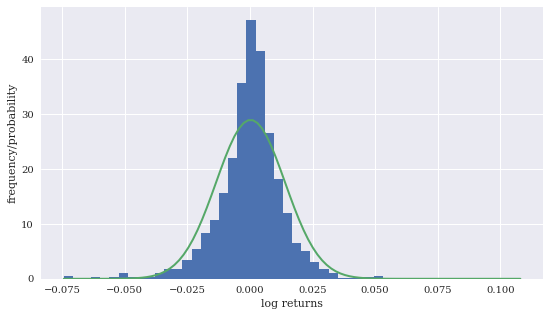

In [22]:
return_histogram(DAX)

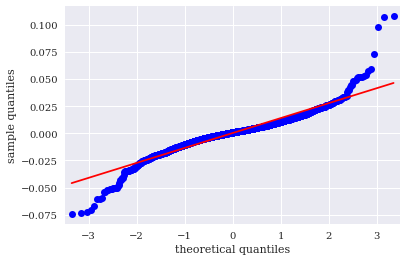

In [23]:
return_qqplot(DAX)

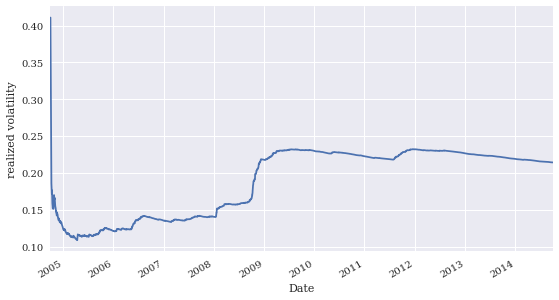

In [24]:
realized_volatility(DAX)

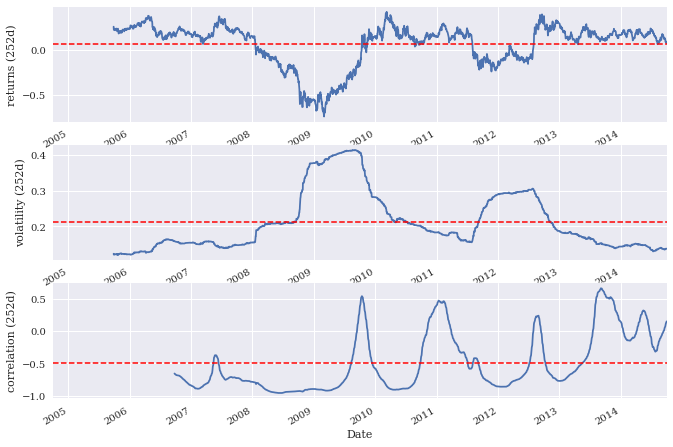

In [25]:
rolling_statistics(DAX)

In [26]:
count_jumps(DAX, 0.05)

32

In [27]:
count_jumps(gbm, 0.05)

0

In [28]:
0.0002911 * len(DAX)

0.7309520999999999

In [29]:
0.0003402 * len(DAX)

0.8542422

## Implied Volatilities

In [30]:
%run 03_stf/ES50_imp_vol.py

In [31]:
mats = sorted(set(data['Maturity']))

In [32]:
pd.DatetimeIndex(mats)

DatetimeIndex(['2014-10-17', '2014-11-21', '2014-12-19', '2015-03-20',
               '2015-06-19', '2015-09-18', '2015-12-18', '2016-06-17',
               '2016-12-16'],
              dtype='datetime64[ns]', freq=None)

In [33]:
dat = data[(data.Maturity == mats[0])
        | (data.Maturity == mats[2])
        | (data.Maturity == mats[3])]

In [34]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 466
Data columns (total 5 columns):
Date        164 non-null int64
Strike      164 non-null float64
Call        164 non-null float64
Maturity    164 non-null int64
Put         164 non-null float64
dtypes: float64(3), int64(2)
memory usage: 7.7 KB


In [35]:
h5 = pd.HDFStore('08_m76/option_data.h5', 'w')
h5['data'] = dat
h5.close()

In [36]:
data.tail()

,Date,Strike,Call,Maturity,Put
498,1412035200000000000,3750.0,27.4,1442534400000000000,635.9
499,1412035200000000000,3800.0,21.8,1442534400000000000,680.3
500,1412035200000000000,3850.0,17.2,1442534400000000000,725.7
501,1412035200000000000,3900.0,13.4,1442534400000000000,772.0
502,1412035200000000000,3950.0,10.4,1442534400000000000,818.9


In [37]:
data['Date'] = pd.DatetimeIndex(data['Date'])

In [38]:
data.tail()

,Date,Strike,Call,Maturity,Put
498,2014-09-30,3750.0,27.4,2015-09-18,635.9
499,2014-09-30,3800.0,21.8,2015-09-18,680.3
500,2014-09-30,3850.0,17.2,2015-09-18,725.7
501,2014-09-30,3900.0,13.4,2015-09-18,772.0
502,2014-09-30,3950.0,10.4,2015-09-18,818.9


In [39]:
data = calculate_imp_vols(data)

In [40]:
S0

3225.9299999999998

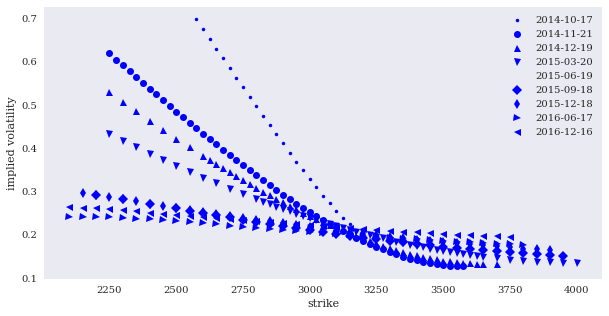

In [41]:
plot_imp_vols(data)

## Interest Rates

In [42]:
%run 03_stf/EURIBOR_analysis.py

In [43]:
EBO = read_euribor_data()

/Users/yves/Dropbox/Work/production/dawp/python36/03_stf/EURIBOR_analysis.py:20: RuntimeWarning: invalid value encountered in log
  EBO['returns'] = np.log(EBO['1w'] / EBO['1w'].shift(1))


In [44]:
EBO.tail()

,1w,2w,1m,2m,3m,6m,9m,12m,returns
2014-09-22,-0.016,-0.012,0.005,0.044,0.082,0.186,0.257,0.345,-0.362905
2014-09-23,-0.014,-0.012,0.005,0.042,0.082,0.185,0.257,0.343,-0.133531
2014-09-24,-0.006,-0.005,0.007,0.043,0.083,0.186,0.257,0.344,-0.847298
2014-09-25,-0.007,-0.006,0.006,0.042,0.082,0.183,0.254,0.342,0.154151
2014-09-30,-0.013,-0.013,0.007,0.043,0.083,0.183,0.251,0.338,0.367725


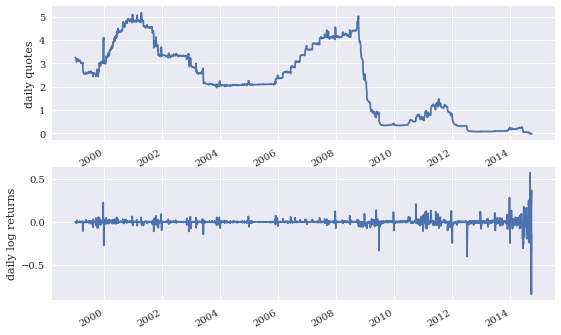

In [45]:
quotes_returns(EBO.rename(columns={'1w' : 'index'}))

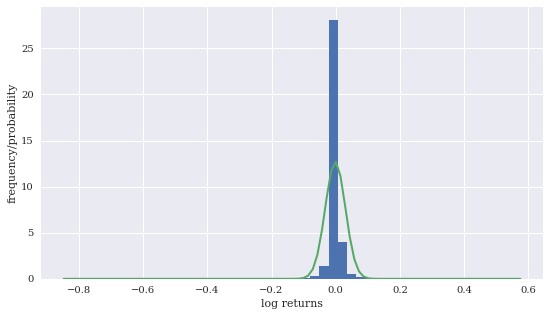

In [46]:
return_histogram(EBO)

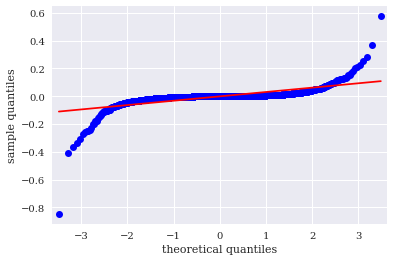

In [47]:
return_qqplot(EBO)

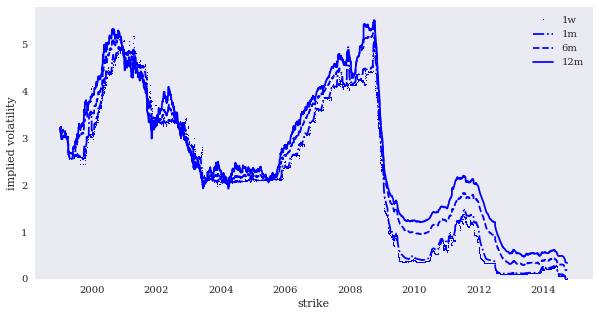

In [48]:
plot_term_structure(EBO)